In [8]:
import pandas as pd

#Punctuations
import string

#reg Expressions
import re

#emojis with description
import demoji

#sentences to words
from nltk.tokenize import TreebankWordTokenizer

#paras to sentences
from nltk.tokenize import sent_tokenize

#stopwords
from nltk.corpus import stopwords

from gensim.models import Word2Vec

import matplotlib.pyplot as plt

# demoji.download_codes()
from datetime import datetime, date

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob

# pd.set_option('display.max_colwidth', 1000)

import operator

import numpy as np

import glob
import os
import math

In [9]:
%%time

os.chdir("C:/Users/Sannath/Desktop/Data Visualization/Assignment-4")

extension = 'csv'

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
merged_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

merged_csv = merged_csv[(merged_csv['language']=='English') | (merged_csv['language']=='Russian') | (merged_csv['language']=='Italian')]




C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magic.py:187: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magic.py:187: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magic.py:187: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


Wall time: 35.1 s


In [10]:
len(merged_csv)

2745873

In [11]:
%%time

merged_csv = merged_csv[(merged_csv['language']=='English') | (merged_csv['language']=='Russian') | (merged_csv['language']=='Italian')].reset_index()

merged_csv['just_date'] = merged_csv['publish_date'].str.split(n=1).str[0]
merged_csv['year'] = merged_csv['just_date'].str.split('/').str[2]
merged_csv['month'] = merged_csv['just_date'].str.split('/').str[0]


merged_csv = merged_csv[merged_csv['year']=='2016']
len(merged_csv)

Wall time: 20.8 s


1057660

In [12]:
# text = merged_csv[['content','language','month','year']]
text = merged_csv[['content','language']]
text_df = text.sort_values(['language'])
text_list = text.values.tolist()
ind_russian = []
ind_english = []
ind_italian = []

for i in range(len(text_list)):
    if text_list[i][1]=='Russian':
        ind_russian.append(i)
    elif text_list[i][1]=='English':
        ind_english.append(i)
    else :
        ind_italian.append(i)


In [13]:
#(1) filtering hyperlinks and 
#(2) remove numbers and convert text into lowercase
#(3) separate emojis from text. create a list of set of emojis, each set represents the emojis in its respective locations tweet 
#(4) Sentiment analysis (polarity & subjectivity in separate lists)
#(5) identifying '#' and creating a list of all hashtags
#(6) removing special characters from string of special characters and meaningful words
#(7) sentence into words
#(8) filtering punctuations
#(9) stop-words for english,russian and italian tweets

In [14]:
%%time
text_h = []
emoji_list = []
sentiment = []
# subjectivity = []
hashtags_list = []
all_hashtags = []
# c = 0

# punch = string.punctuation

stop_words_e = stopwords.words('english')
stop_words_r = stopwords.words('russian')
stop_words_i = stopwords.words('italian')

for i in range(len(text_list)):
    
#     if not text_list[i][0] :
#         c += 1
#         print(type(text_list[i][0]))

#     try:
        # (1)
        tweet = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', text_list[i][0], flags=re.MULTILINE)

        # (2)
#         tweet = re.sub(r'\d+', '', tweet)
#         tweet = tweet.lower()

        # (3)
#         emoji_set = demoji.findall(tweet)
#         emoji_list.append(emoji_set)
#         for emoji in emoji_set:
#             tweet = tweet.replace(emoji,'')

        # (4) sentiment analysis
#         blob = TextBlob(tweet)
# #         sentiment.append(blob.sentiment.polarity)
# #         subjectivity.append(blob.sentiment.subjectivity)
#         sentiment.append(blob.sentiment)

        # (5) remove # and store word in list
        hashtags_per_tweet = re.findall('\#(\w*)',tweet)
        hashtags_list.append(hashtags_per_tweet)
        if len(hashtags_per_tweet)>0:
            for hashtag in hashtags_per_tweet:
                all_hashtags.append(hashtag)

        # (6)removing special characters from string of special characters and meaningful words
#         tweet = tweet.translate(str.maketrans('', '', string.punctuation))

        # (7)
#         tweet = TreebankWordTokenizer().tokenize(tweet)
#         tweet.sort()

        # (8)
#         tweet = [words for words in tweet if words not in punch]

        # (9)
#         if i<len(ind_english):
#             tweet = [words for words in tweet if words not in stop_words_e]
#         elif i>=len(ind_english) and i<len(ind_russian):
#             tweet = [words for words in tweet if words not in stop_words_r]
#         else :
#             tweet = [words for words in tweet if words not in stop_words_i]
#         text_h.append(tweet)
#     except:
#         if ((math.isnan(text_list[i][0])) | (math.isinf(text_list[i][0]))):
#             text_list[i][0] = ''
#             text_h.append(text_list[i][0])
    


Wall time: 9.9 s


In [35]:
u_hashtags = pd.DataFrame(all_hashtags, columns=['col1'])
u_hashtags
u_hashtags = u_hashtags.groupby('col1').nunique()
u_hashtags.sort_values(by=[''], ascending=False)
u_hashtags

ValueError: 'col1' is both an index level and a column label, which is ambiguous.

In [ ]:
nearestNeighbours = model.most_similar('woman')
nearestWomen = [i[0] for i in nearestNeighbours]
nearestWomen = ' '.join(nearestWomen).replace('-','')
nearestWomen


In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1500, width=4000).generate(nearestWomen)
# plt.figure(figsize=(16,8))
plt.title("Words similar to woman")
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
# plt.savefig("woman",dpi=500)

In [8]:
# load additional module
import pickle


#  list of list of words
with open('text_h.txt', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(text_h, filehandle)
    
# hashtags
with open('all_hashtags.txt', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(all_hashtags, filehandle)
    
    
# emojis
with open('emoji_list.txt', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(emoji_list, filehandle)
    
# sentiment
with open('sentiment.txt', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(sentiment, filehandle)
   
 #load additional module
# with open('listfile.txt', 'rb') as filehandle:
#     # read the data as binary data stream
#     placesList1 = pickle.load(filehandle)


PicklingError: Can't pickle <class 'textblob.en.sentiments.Sentiment'>: attribute lookup Sentiment on textblob.en.sentiments failed

In [10]:
# plot - 1 : Tweets in Years

In [11]:
analyzeYears = merged_csv.groupby(['year'])['author'].count().reset_index()
# analyzeYears

,year,author
0,2012,423
1,2013,197
2,2014,7620
3,2015,766866
4,2016,1057660
5,2017,905874
6,2018,7233


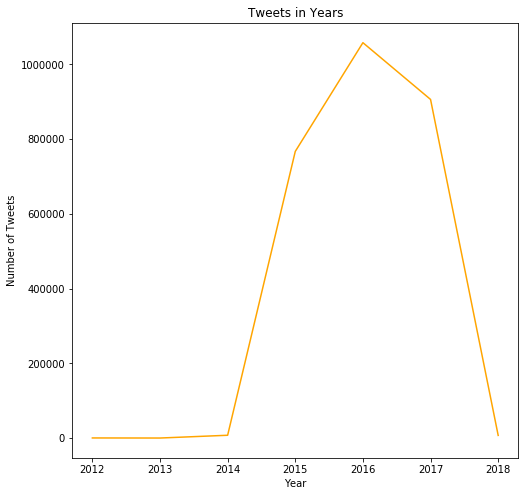

In [13]:
plt.rcParams["figure.figsize"] =  [8, 8]
plt.plot(analyzeYears.year, analyzeYears.author, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Tweets in Years')
# xticks(np.arange(1995, 2015, step=2))
# plt.show()
plt.savefig("Tweets in Years",dpi=500)

In [19]:
data2016 = merged_csv.loc[merged_csv['year'] == '2016']
data2016 = data2016.sort_values(by=['month'])
analyzemonths = data2016.sort_values(by=['month'], ascending=True).groupby(['month'])['author'].count().reset_index()
analyzemonths['month'] = pd.to_numeric(analyzemonths.month)
aMonth = analyzemonths.sort_values(by=['month'], ascending=True)

In [24]:
# import calendar
# merged_csv['month'] = merged_csv['month'].apply(lambda x: calendar.month_abbr[x])
# merged_csv[:1]

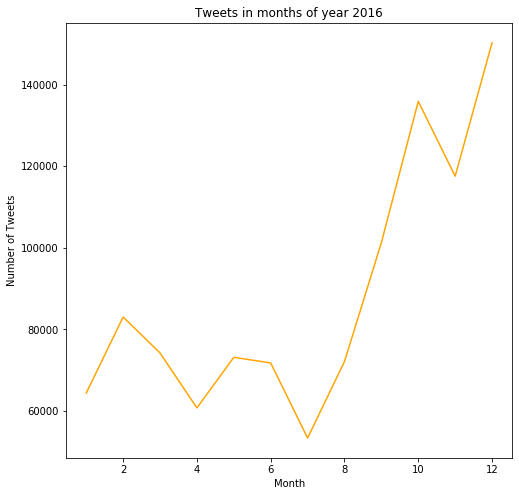

In [26]:
plt.rcParams["figure.figsize"] =  [8, 8]
plt.plot(aMonth.month, aMonth.author, color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Tweets in months of year 2016')
# xticks(np.arange(1995, 2015, step=2))
# plt.show()
plt.savefig("Tweets in months of 2016",dpi=500)

In [46]:
# plot - 3 : Trending Hashtags
len(merged_csv)
merged_csv['author'][2745872]

'POLITICS_T0DAY'

In [50]:
merged_csv = merged_csv.drop(merged_csv.index[2745872])

In [53]:
polarity = []
subjectivity = []
for x in sentiment:
    polarity.append(x.polarity)
    subjectivity.append(x.subjectivity)

In [54]:
merged_csv['polarity'] = polarity
merged_csv['subjectivity'] = subjectivity

In [55]:
flatten  = [y for x in hashtags_list for y in x]

In [58]:
wordfreq = {}
for w in flatten:
    if w in wordfreq:
        wordfreq[w] +=1
    else:
        wordfreq[w] = 1
sorted_x = sorted(wordfreq.items(), key=operator.itemgetter(1),reverse=True)
sorted_x = sorted_x[:18]
trendingHashtag = [x[0] for x in sorted_x]
trendingHashtagNo = [x[1] for x in sorted_x]
# sorted_x

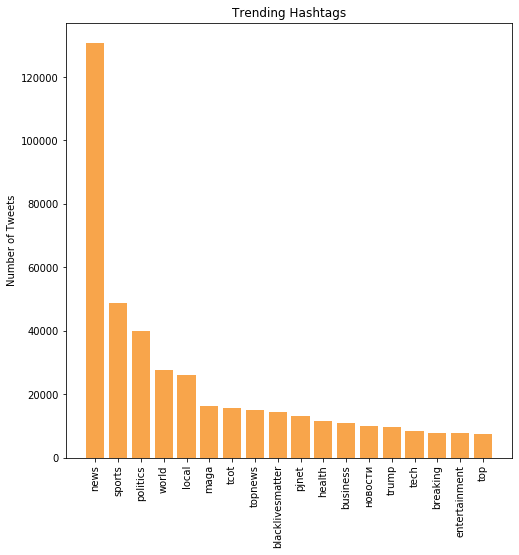

In [60]:
y_pos = np.arange(len(trendingHashtag))
# plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, trendingHashtagNo, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, trendingHashtag,rotation='vertical')
plt.ylabel('Number of Tweets')
plt.title('Trending Hashtags')
# plt.show()
plt.savefig("TrendingHashtags",dpi=500)

In [67]:
# plot - 4 : Tweet sentiment over the years


In [68]:
# most used words trend
file1 = merged_csv[merged_csv['content'].str.contains("trump",na=False)]
file2 = merged_csv[merged_csv['content'].str.contains("hillary",na=False)]

In [69]:
years = ['2014','2015','2016','2017','2018']

In [70]:
# most used words trend sentiment
data2014_trump = file1.loc[file1['year'] == '2014']
data2015_trump = file1.loc[file1['year'] == '2015']
data2016_trump = file1.loc[file1['year'] == '2016']
data2017_trump = file1.loc[file1['year'] == '2017']
data2018_trump = file1.loc[file1['year'] == '2018']

In [71]:
# most used words trend sentiment
data2014_hillary = file2.loc[file2['year'] == '2014']
data2015_hillary = file2.loc[file2['year'] == '2015']
data2016_hillary = file2.loc[file2['year'] == '2016']
data2017_hillary = file2.loc[file2['year'] == '2017']
data2018_hillary = file2.loc[file2['year'] == '2018']

In [72]:
attr1_trump = data2014_trump['polarity'].mean(axis = 0, skipna = True)
attr2_trump = data2015_trump['polarity'].mean(axis = 0, skipna = True)
attr3_trump = data2016_trump['polarity'].mean(axis = 0, skipna = True)
attr4_trump = data2017_trump['polarity'].mean(axis = 0, skipna = True)
attr5_trump = data2018_trump['polarity'].mean(axis = 0, skipna = True)
polarity_trump = [attr1_trump,attr2_trump,attr3_trump,attr4_trump,attr5_trump]

In [73]:
attr1_hillary = data2014_hillary['polarity'].mean(axis = 0, skipna = True)
attr2_hillary = data2015_hillary['polarity'].mean(axis = 0, skipna = True)
attr3_hillary = data2016_hillary['polarity'].mean(axis = 0, skipna = True)
attr4_hillary = data2017_hillary['polarity'].mean(axis = 0, skipna = True)
attr5_hillary = data2018_hillary['polarity'].mean(axis = 0, skipna = True)
polarity_hillary = [attr1_hillary,attr2_hillary,attr3_hillary,attr4_hillary,attr5_hillary]

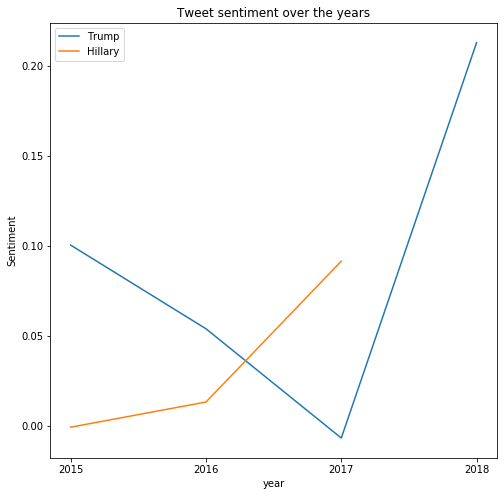

In [74]:
plt.plot(years, polarity_trump, label = "Trump")
plt.plot(years, polarity_hillary, label = "Hillary")
plt.xlabel('year')
plt.ylabel('Sentiment')
plt.title('Tweet sentiment over the years')
plt.legend()
# plt.show()
plt.savefig("sentiment",dpi=500)

In [115]:
hashtag2016 = merged_csv.loc[merged_csv['year'] == '2016']
hashtag2016

KeyError: MemoryError()

In [ ]:
# plot - 5 : tweetes posted about hillary in 2016

In [91]:
# authors_negativity = data2016_hillary.author.unique()
authors_negativity = data2016_hillary.groupby(['author'])['index'].count().reset_index()
authors_negativity = authors_negativity[:20]

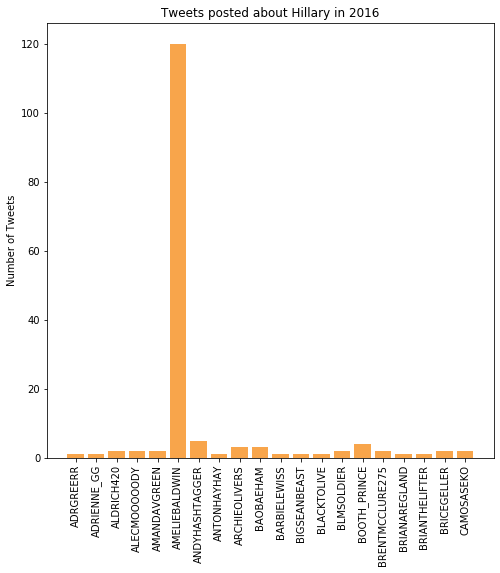

In [92]:
y_pos = np.arange(len(authors_negativity['author']))
plt.bar(y_pos, authors_negativity['index'], align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, authors_negativity['author'],rotation='vertical')
plt.ylabel('Number of Tweets')
plt.title('Tweets posted about Hillary in 2016')
# plt.show()
plt.savefig("Tweets posted about Hillary in 2016",dpi=500)

In [93]:
# plot - 6 : folllowers over the years

In [94]:
authors_negativity = authors_negativity.sort_values(by=['index'], ascending=False)
authorDetails = merged_csv.loc[merged_csv['author'] == authors_negativity['author'][0]].reset_index()
authorDetails = authorDetails.loc[authorDetails.groupby("year")["index"].idxmax()]

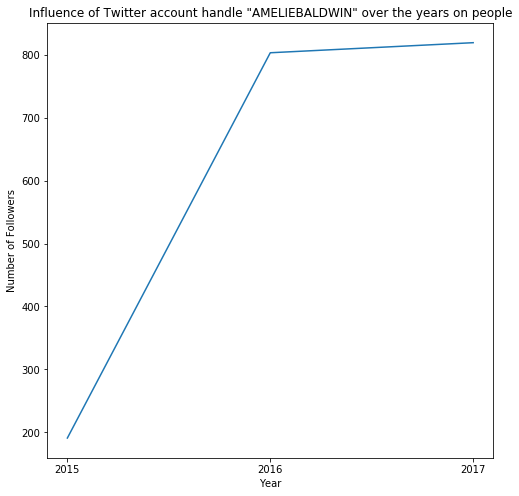

In [97]:
# plt.rcParams["figure.figsize"] =  [12, 12]
plt.plot(authorDetails['year'], authorDetails['followers'])
plt.xlabel('Year')
plt.ylabel('Number of Followers')
plt.title('Influence of Twitter account handle "AMELIEBALDWIN" over the years on people')
# plt.legend()
plt.show()
# plt.savefig("sentiment",dpi=500)

In [ ]:
#plot - 7 : Tweet subjectivity over the years

In [98]:
attr1_trump = data2014_trump['subjectivity'].mean(axis = 0, skipna = True)
attr2_trump = data2015_trump['subjectivity'].mean(axis = 0, skipna = True)
attr3_trump = data2016_trump['subjectivity'].mean(axis = 0, skipna = True)
attr4_trump = data2017_trump['subjectivity'].mean(axis = 0, skipna = True)
attr5_trump = data2018_trump['subjectivity'].mean(axis = 0, skipna = True)
subjectivity_trump = [attr1_trump,attr2_trump,attr3_trump,attr4_trump,attr5_trump]

In [99]:
attr1_hillary = data2014_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr2_hillary = data2015_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr3_hillary = data2016_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr4_hillary = data2017_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr5_hillary = data2018_hillary['subjectivity'].mean(axis = 0, skipna = True)
subjectivity_hillary = [attr1_hillary,attr2_hillary,attr3_hillary,attr4_hillary,attr5_hillary]

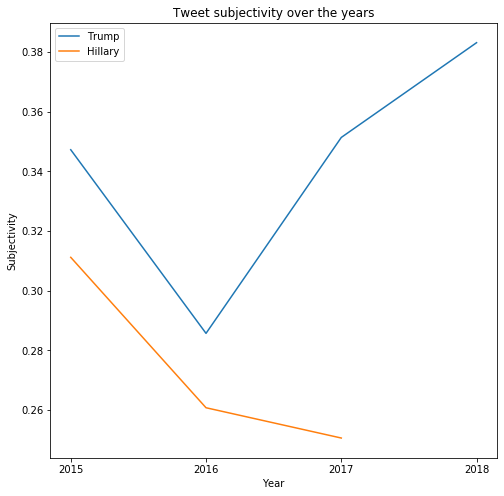

In [101]:
plt.plot(years, subjectivity_trump, label = "Trump")
plt.plot(years, subjectivity_hillary, label = "Hillary")
plt.xlabel('Year')
plt.ylabel('Subjectivity')
plt.title('Tweet subjectivity over the years')
plt.legend()
# plt.show()
plt.savefig("Tweet subjectivity over the years",dpi=500)

In [11]:
# one-hot vector
# text_h

In [102]:
# Bigram
model = Word2Vec(text_h)

In [ ]:
# 1-Skip-gram
skip_model = Word2Vec(text_h,sg = 1)

In [104]:
words = list(model.wv.vocab)
highest = 0
for x in words:
    result = model.most_similar(positive=['woman', x], negative=['man'], topn=1)
    print(x)
    print(result)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


KeyError: "word 'woman' not in vocabulary"

In [108]:
result = model.most_similar(positive=['mr', 'industrial'], negative=['madam'], topn=1)
print(result)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'mr' not in vocabulary"

In [ ]:
result = model.most_similar_cosmul(positive=['woman', 'industrial'], negative=['man'])
print(result)

In [ ]:
nearestNeighbours = model.most_similar('man')
nearestMen = [i[0] for i in nearestNeighbours]
nearestMen = ' '.join(nearestMen).replace('-','')
nearestMen

In [ ]:
#compare it with skipgram also
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1500, width=4000).generate(nearestMen)
# plt.figure(figsize=(16,8))
plt.title("Words similar to man")
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
# plt.savefig("words1",dpi=500)

In [ ]:
nearestNeighbours = model.most_similar('woman')
nearestWomen = [i[0] for i in nearestNeighbours]
nearestWomen = ' '.join(nearestWomen).replace('-','')
nearestWomen


In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1500, width=4000).generate(nearestWomen)
# plt.figure(figsize=(16,8))
plt.title("Words similar to woman")
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
# plt.savefig("woman",dpi=500)

In [ ]:
#if exists in whole dataset
nearestNeighbours = model.most_similar('africa') #black american African American to show racism
racism = [i[0] for i in nearestNeighbours]
# nearestWomen = ' '.join(nearestWomen).replace('-','')
racism

In [ ]:
#words occurances in our trained model
#not used anywhere, we can use instead of getting popular names from hashtags
w2c = dict()
for item in model.wv.vocab:
    w2c[item]=model.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
# w2cSorted